# **Intern Career**
 **We speak data**

Evaluation of a dataset with valuable
information about the top YouTube streamers,
including their ranking, categories, subscribers,
country, visits, likes, comments, and more.

### Load Packages

In [2]:
import pandas as pd
import numpy as np

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
df =pd.read_csv("youtubers_df.csv")
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


### In the following section, we will execute foundational data evaluations to foster a deeper understanding of the dataset.

In [ ]:
df.shape

(1000, 9)

In [ ]:
df.dtypes

Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [ ]:
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


### Correlation matrix

<ipython-input-10-d52cb299e03b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


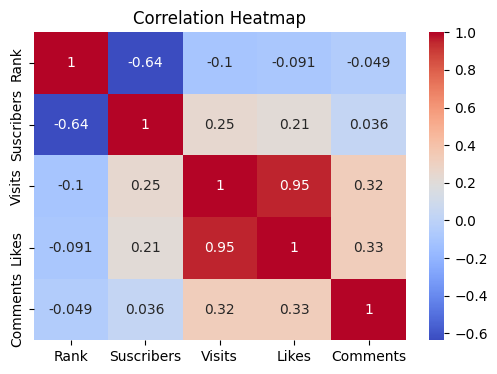

In [ ]:
# Calculate the correlation matrix
correlation = df.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In the heatmap visualization, it is evident that the majority of columns exhibit a relatively weaker linear relationship. Notably, the correlation analysis highlights a strong positive linear relationship (correlation coefficient of 0.95) between the 'likes' and 'visits' columns, indicating a robust association between these two variables. This finding suggests that as the number of likes increases, there is a corresponding notable increase in the number of visits, demonstrating a positive correlation.

### Count of Categories column

In [ ]:
word_counts = df['Categories'].value_counts()
word_counts

Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehículos      

Above, we conducted a frequency analysis to determine the prevalence of each category, revealing that 'Musica y baile' emerges as the most frequently occurring category. This information provides insights into the popularity distribution among the categories, with 'Musica y baile' standing out as the most prevalent.

Let's delve deeper into the 'Musica y baile' category by aggregating key metrics. We will sum up the counts for likes, subscribers, and comments to identify the top-performing category in terms of these engagement metrics. This analysis aims to provide a comprehensive understanding of the relative popularity and engagement within the 'Musica y baile' category.

### Sum of subscribers by category

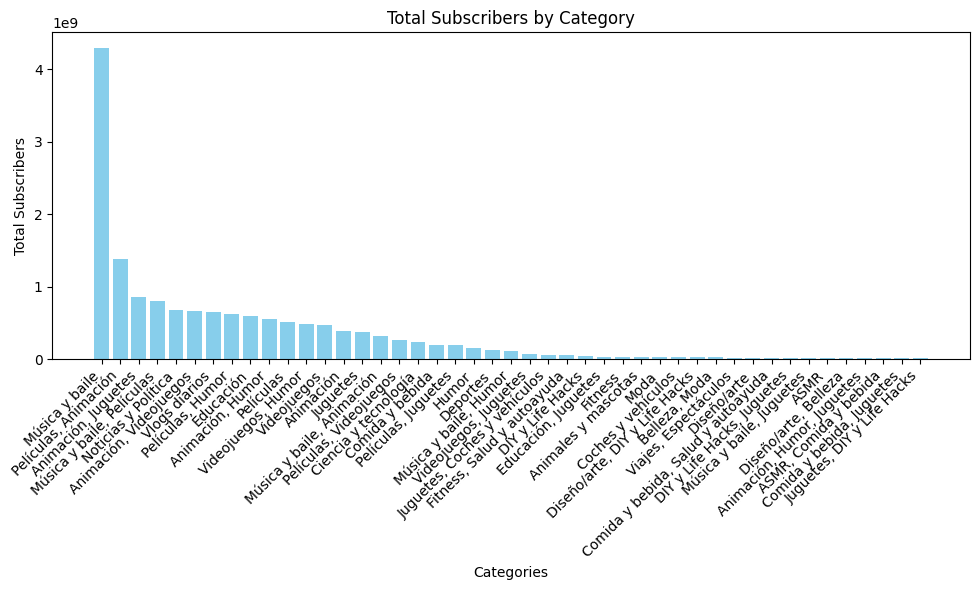

In [ ]:
# Group by 'category' and sum the 'subscribers'
subscribers_per_category = df.groupby('Categories')['Suscribers'].sum().reset_index()
df_category = subscribers_per_category.sort_values(by='Suscribers', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_category['Categories'], df_category['Suscribers'], color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Total Subscribers')
plt.title('Total Subscribers by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Sum of likes by category

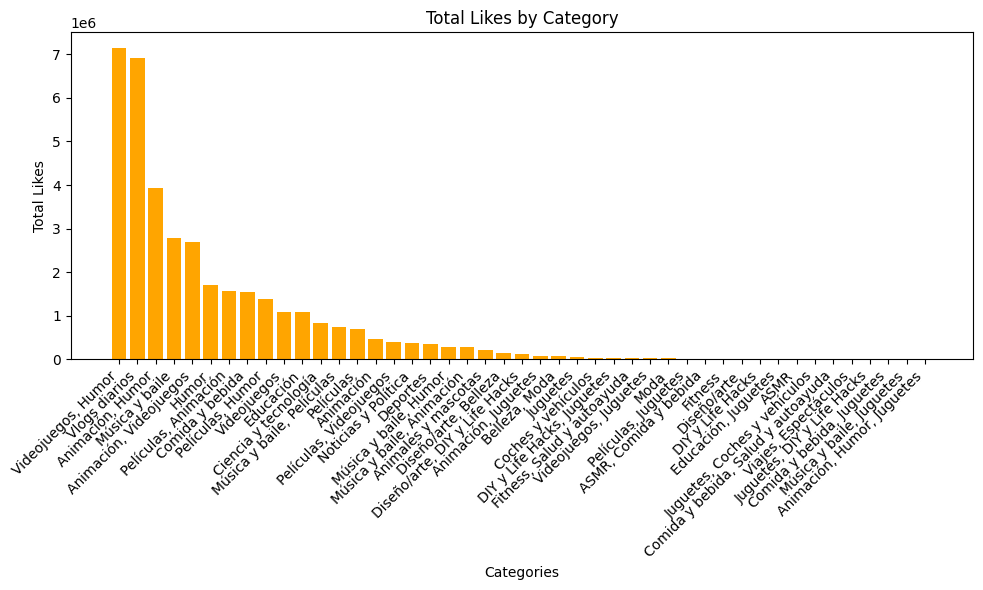

In [ ]:
# Group by 'category' and sum the 'likes'
likes_per_category = df.groupby('Categories')['Likes'].sum().reset_index()
category_likes = likes_per_category.sort_values(by='Likes', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(category_likes['Categories'], category_likes['Likes'], color='orange')
plt.xlabel('Categories')
plt.ylabel('Total Likes')
plt.title('Total Likes by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Sum of Comments by Category

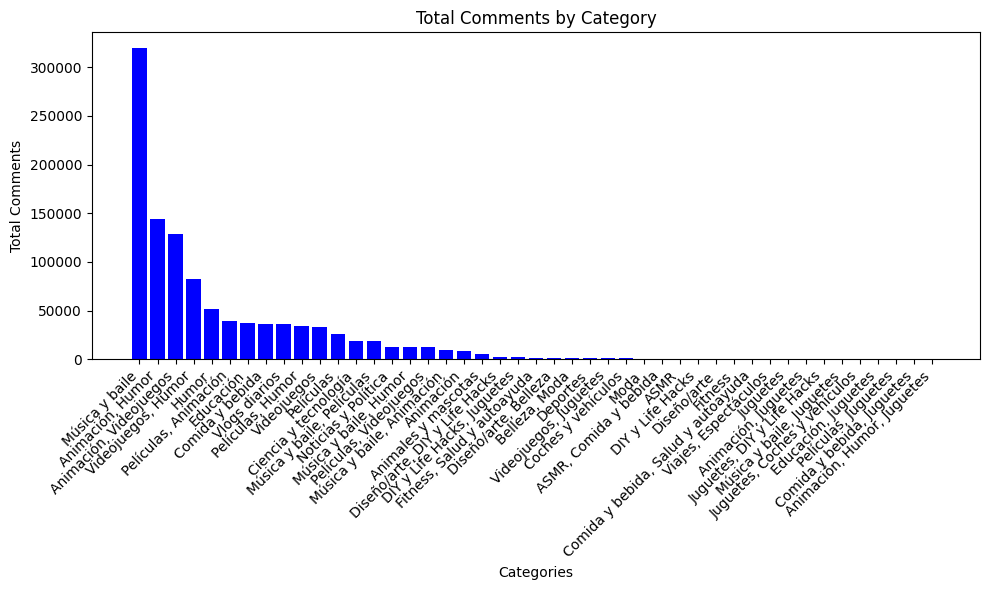

In [ ]:
# Group by 'category' and sum the 'comments'
comments_per_category = df.groupby('Categories')['Comments'].sum().reset_index()
category_comments = comments_per_category.sort_values(by='Comments', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(category_comments['Categories'], category_comments['Comments'], color='blue')
plt.xlabel('Categories')
plt.ylabel('Total Comments')
plt.title('Total Comments by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

The analysis of the bar graphs reveals distinctive patterns across categories in terms of engagement metrics. Specifically, the 'Musica y baile' category emerges as a frontrunner, securing the top position for both total subscribers and total comments. This signifies a substantial audience base and a high level of interactivity within the category.

However, when considering the 'Likes' metric, a different trend unfolds. The 'Videojuegos, Humor' category claims the lead in terms of total likes, surpassing 'Musica y baile,' which occupies the fourth position in this particular metric.

In summary, while 'Musica y baile' demonstrates superior performance in garnering subscribers and eliciting comments, it lags behind in terms of total likes compared to the 'Videojuegos, Humor' category. This subtle perspective underscores the varied engagement dynamics within different content categories.

### User with the most likes

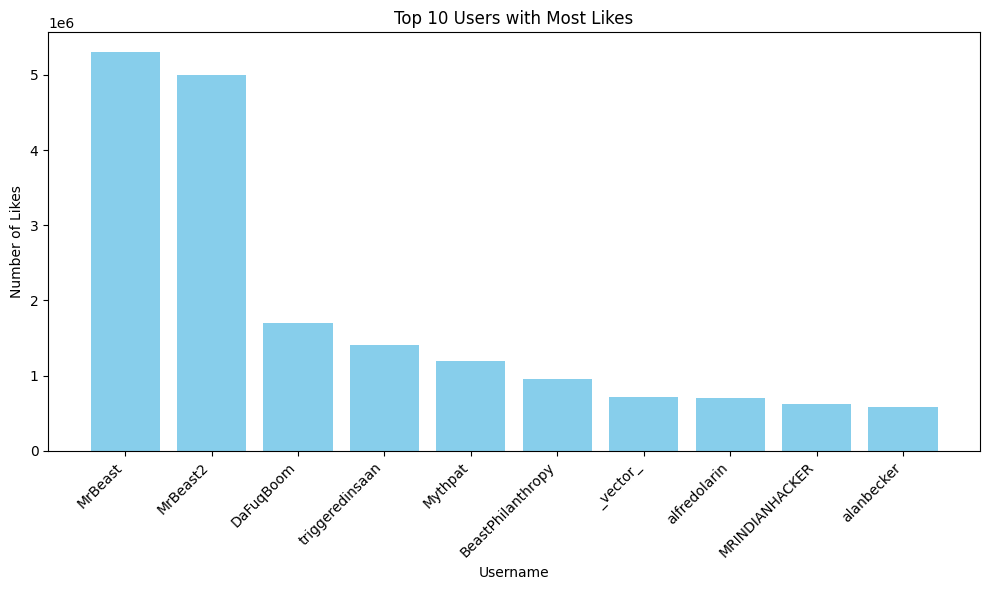

In [ ]:
# Sort the DataFrame by the 'likes' column in descending order
df_sorted = df.sort_values(by='Likes', ascending=False)

# Select the top 10 users
top_10 = df_sorted.head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10['Username'], top_10['Likes'], color='skyblue')
plt.xlabel('Username')
plt.ylabel('Number of Likes')
plt.title('Top 10 Users with Most Likes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

The presented bar graph succinctly communicates that MrBeast has accumulated the highest number of likes among the featured YouTubers, with MrBeast2 following closely behind. In essence, this graphical representation unmistakably identifies MrBeast as the YouTuber with the highest likes within the dataset, reinforcing his prominence in terms of user engagement.

### User with the most subscribers

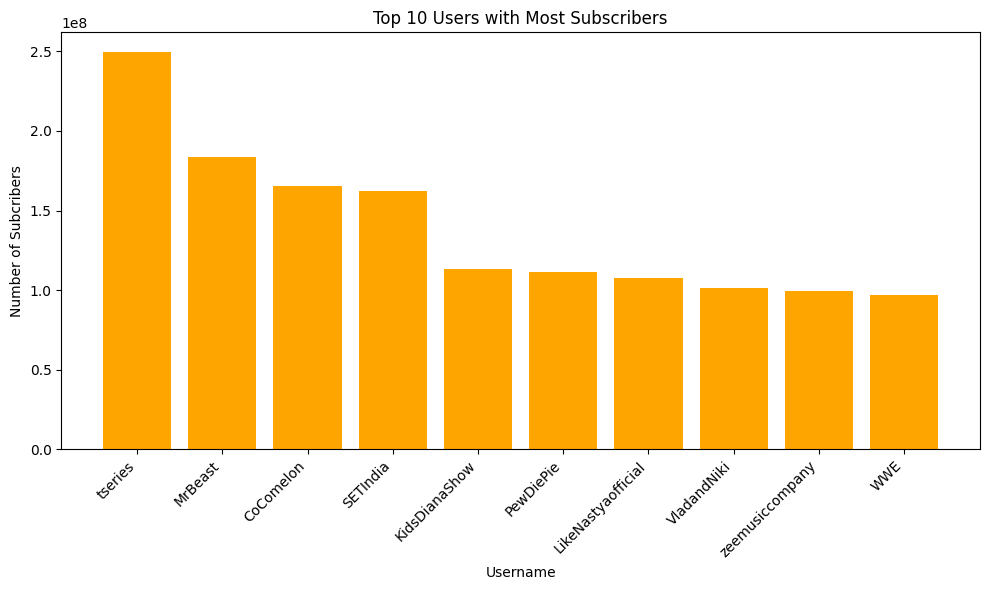

In [ ]:
# Sort the DataFrame by the 'subscribers' column in descending order
df_subs = df.sort_values(by='Suscribers', ascending=False)

# Select the top 10 users
top_10_subs = df_subs.head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_subs['Username'], top_10_subs['Suscribers'], color='orange')
plt.xlabel('Username')
plt.ylabel('Number of Subcribers')
plt.title('Top 10 Users with Most Subscribers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

The above graph highlights T-Series as the user who has gained the highest number of subscribers. This observation underscores T-Series' substantial growth in terms of audience acquisition, positioning them as the leading entity in subscriber count within the dataset.

### User with the most comments

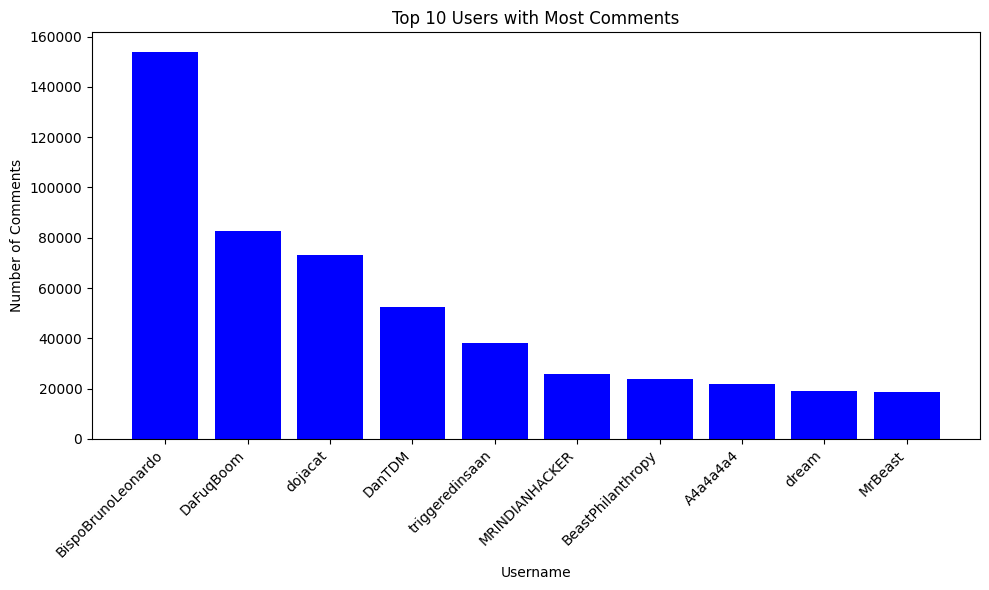

In [ ]:
# Sort the DataFrame by the 'Comments' column in descending order
df_com = df.sort_values(by='Comments', ascending=False)

# Select the top 10 users
top_10_com = df_com.head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_com['Username'], top_10_com['Comments'], color='blue')
plt.xlabel('Username')
plt.ylabel('Number of Comments')
plt.title('Top 10 Users with Most Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

The graph analysis distinctly points out that BispoBrunoLeonardo is the user who has generated a significant number of comments. This finding underscores the high level of interaction and engagement associated with BispoBrunoLeonardo's content, as reflected in the considerable volume of comments attributed to this user.

### Users with the most account visits

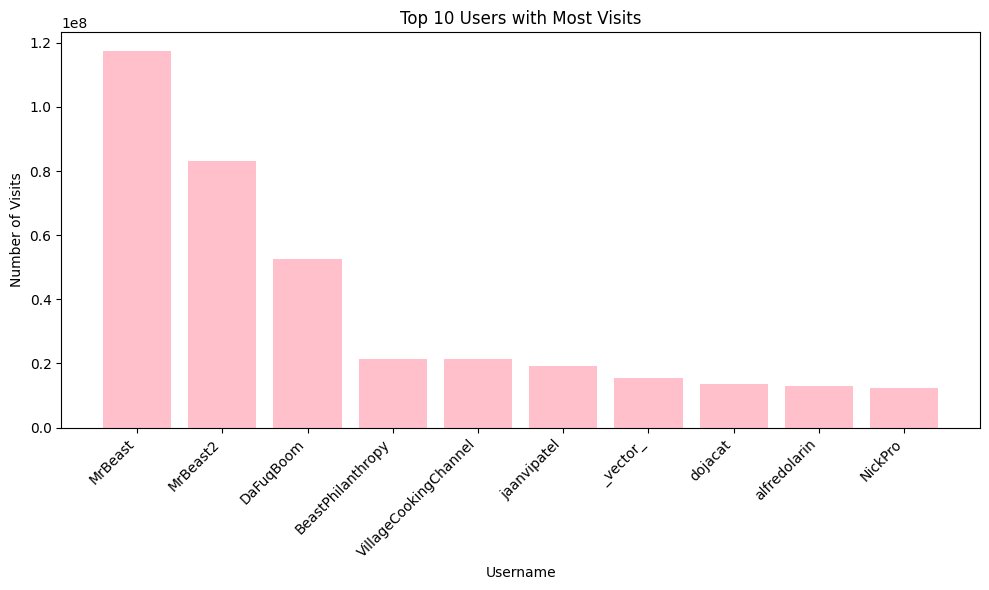

In [ ]:
# Sort the DataFrame by the 'visits' column in descending order
df_visit = df.sort_values(by='Visits', ascending=False)

# Select the top 10 users
top_10_visit = df_visit.head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_visit['Username'], top_10_visit['Visits'], color='pink')
plt.xlabel('Username')
plt.ylabel('Number of Visits')
plt.title('Top 10 Users with Most Visits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

The comprehensive analysis of the graph leaves no room for ambiguity: MrBeast indisputably stands out as the user with the highest number of visits, underscoring his substantial impact in viewer engagement. Notably, this observation aligns with MrBeast's prominent position at the summit in terms of likes and a commendable second place in the realm of subscribers. This consistent performance across multiple metrics reinforces MrBeast's influential role and widespread appeal within the dataset.

### Country with the most users.

In [ ]:
country_counts = df['Country'].value_counts()
country_counts

Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: Country, dtype: int64

The data analysis reveals that Estados Unidos boasts the highest number of users within the dataset. This finding highlights the significant presence and representation of users originating from this country, indicating its prominence as the country with the most users in the observed dataset.

Continuing our evaluation of the top country, we extend our analysis by examining whether Estados Unidos maintains its leading position in various engagement metrics. Specifically, we investigate if it holds the highest number of subscribers, likes, and comments. This multifaceted approach allows us to comprehensively assess the country's prominence not only in terms of user count but also in terms of the quantitative indicators of subscriber engagement, content appreciation (likes), and audience interaction (comments).

### Top country by subscribers

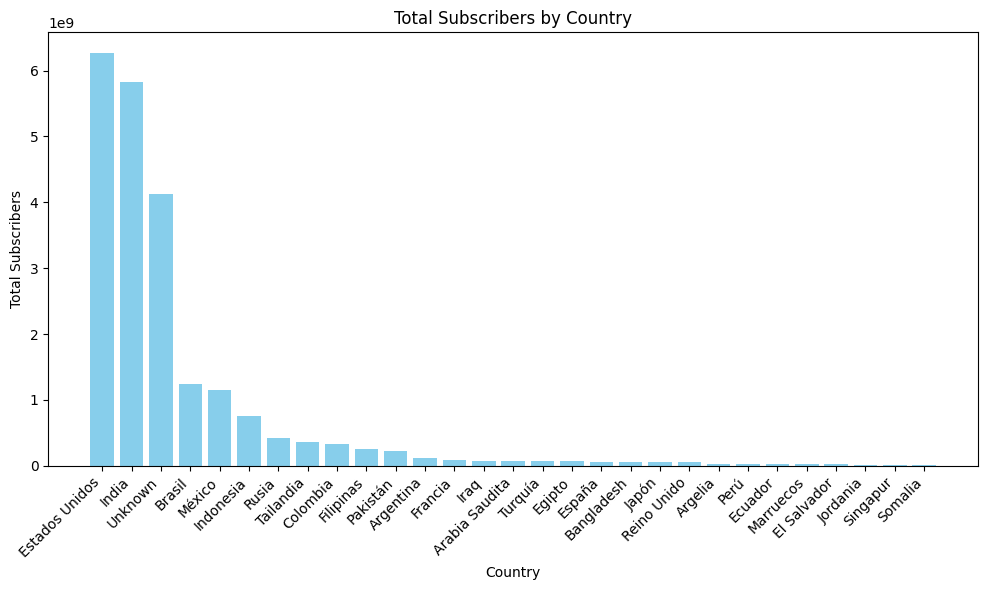

In [5]:
# Group by 'country' and sum the 'subscribers'
subscribers_per_country = df.groupby('Country')['Suscribers'].sum().reset_index()
df_country = subscribers_per_country.sort_values(by='Suscribers', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_country['Country'], df_country['Suscribers'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Subscribers')
plt.title('Total Subscribers by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Top country by likes

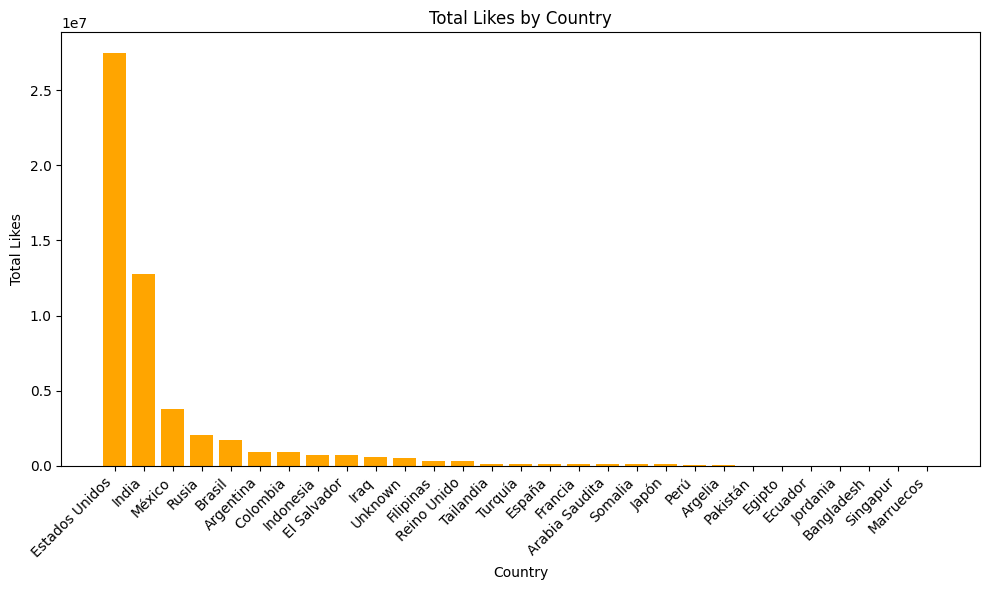

In [6]:
# Group by 'country' and sum the 'likes'
likes_per_country = df.groupby('Country')['Likes'].sum().reset_index()
country_likes = likes_per_country.sort_values(by='Likes', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(country_likes['Country'], country_likes['Likes'], color='orange')
plt.xlabel('Country')
plt.ylabel('Total Likes')
plt.title('Total Likes by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

### Top country by comments

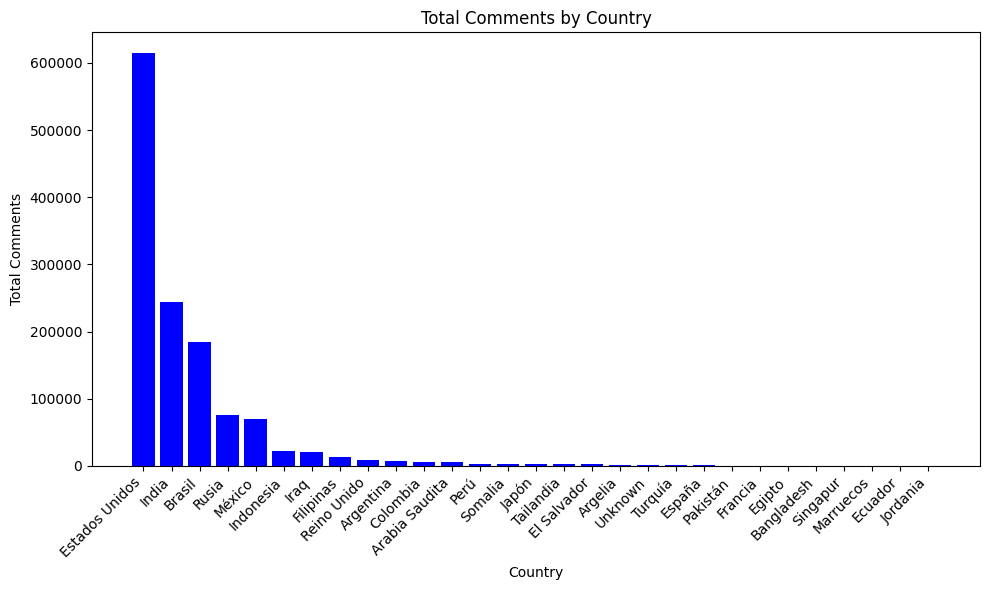

In [7]:
# Group by 'country' and sum the 'comments'
comments_per_country = df.groupby('Country')['Comments'].sum().reset_index()
country_comments = comments_per_country.sort_values(by='Comments', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(country_comments['Country'], country_comments['Comments'], color='blue')
plt.xlabel('Country')
plt.ylabel('Total Comments')
plt.title('Total Comments by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


Upon thorough evaluation, our analysis indicates that Estados Unidos indeed secures the top position across multiple metrics, including likes, comments, and subscribers. India closely follows in the second position. However, noteworthy variations emerge from the third position onward, highlighting distinct country-specific trends in the distribution of engagement metrics. This subtle perspective provides a comprehensive understanding of the countries' relative standings in terms of user appreciation, interaction, and subscription rates.

### Most frequent category per country

In [9]:
most_frequent_category_per_country = df.groupby('Country')['Categories'].apply(lambda x: x.mode().iat[0] if not x.mode().empty else None).reset_index(name='most_frequent_category')
most_frequent_category_per_country

,Country,most_frequent_category
0,Arabia Saudita,Música y baile
1,Argelia,Educación
2,Argentina,"Películas, Animación"
3,Bangladesh,Noticias y Política
4,Brasil,Música y baile
5,Colombia,Música y baile
6,Ecuador,None
7,Egipto,"Música y baile, Películas"
8,El Salvador,None
9,España,"Películas, Animación"


The examination of top categories in each country validates and extends our earlier findings. For our primary focus on Estados Unidos, the top category is consistently identified as Musica y baile, aligning seamlessly with the previously observed trends. This robust correlation between Musica y baile and high engagement metrics, such as total subscribers and comments, reinforces its status as a leading category in the top country.

Moreover, this pattern extends to India, the second-ranked country, where Musica y baile also emerges as the top category. The widespread prevalence of Musica y baile as the top category in numerous countries further underscores its global appeal and popularity across diverse audiences.

### Conclusion

In summary, the recurrent prominence of Musica y baile as the top category in multiple countries substantiates its universal popularity and strong correlation with heightened user engagement.

The metrics used for evaluation are subject to change, and trends may vary over time. Currently, the top-performing country is Estados Unidos, with the predominant category being Musica y baile and the leading user identified as MrBeast. It's essential to acknowledge that these conclusions are based on the existing data, and shifts in metrics or user dynamics may occur, as trends are inherently dynamic and influenced by various factors.